In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import utils

In [2]:
yyyy = '2024'
mm = '09'
dd = '28'
station_id = '0-250-1001-07151-B'
path = f'../data/{yyyy}/{mm}/{dd}/AP_{station_id}-{yyyy}-{mm}-{dd}.nc'

In [3]:
vars = ['attenuated_backscatter_0']
ds = xr.open_dataset(path)[vars].load()

# calculate snr
ds = utils.snr(ds, 'attenuated_backscatter_0', step=1)

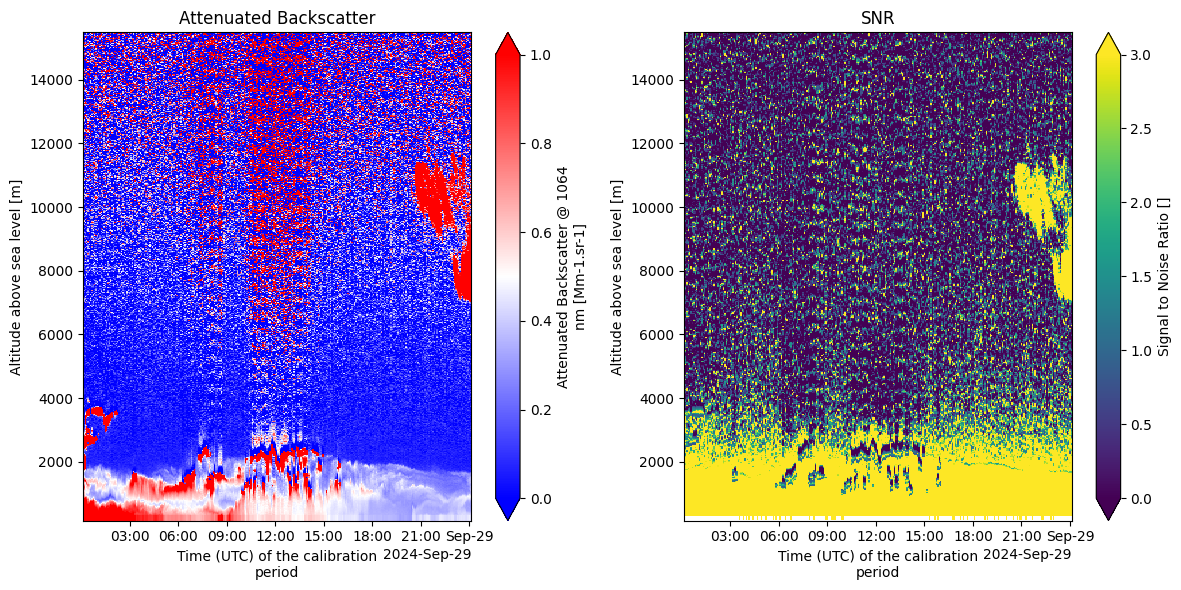

In [4]:
utils.plot_pannel(ds, {
        'variable': 'attenuated_backscatter_0',
        'title': 'Attenuated Backscatter',
        'vmin': 0,
        'vmax': 1,
        'cmap': 'bwr'
    }, {
        'variable': 'snr',
        'title': 'SNR',
        'vmin': 0,
        'vmax': 3,
        'cmap': 'viridis'
    })

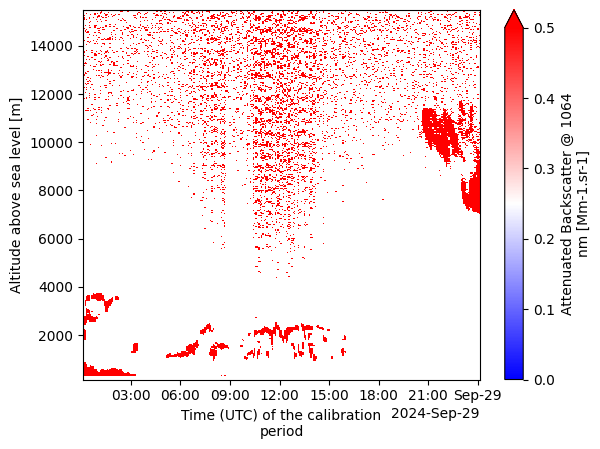

In [7]:
thr_cloud = 1
thr_snr = 0

filtered_ds = ds.where(ds.attenuated_backscatter_0>=thr_cloud).where(ds.snr>=thr_snr)
filtered_ds.attenuated_backscatter_0.transpose().plot(vmin=0, vmax=0.5, cmap='bwr')